# Covid19_ Use Dataset

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.
Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment.
The virus that causes COVID-19 is mainly transmitted through droplets generated when an infected person coughs, sneezes, or exhales. These droplets are too heavy to hang in the air, and quickly fall on floors or surfaces.
You can be infected by breathing in the virus if you are within close proximity of someone who has COVID-19, or by touching a contaminated surface and then your eyes, nose or mouth.

** citate from - https://www.who.int/emergencies/diseases/novel-coronavirus-2019

* Globally til now this diseases has claimed approximaetely 2,244,713 life since its outbreak in March 2020.
* Total no.of. confirmed cases as on 3rd Feb 2021 is approximately 103,362,039 & has impacted over 223 countries & territories.

Lets understand a bit about this virus from the past data.

Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
cdf = pd.read_csv('covid_dataset.csv')
cdf

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [3]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [4]:
cdf.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

There are no null values in eh data, but the column Date is in object format hence processing to convert the same to datetime format.

In [5]:
cdf_1=cdf
cdf_1['Date'] = pd.to_datetime(cdf_1['Date'], format = '%Y-%m-%d',  errors = 'coerce')

In [6]:
cdf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


In [7]:
cdf_1['Date'].sample(50)

1501    2020-01-29
6044    2020-02-23
398     2020-01-24
16504   2020-04-18
17163   2020-04-22
12140   2020-03-26
23216   2020-05-24
15110   2020-04-11
6737    2020-02-26
1318    2020-01-29
15606   2020-04-14
8522    2020-03-07
9277    2020-03-11
15152   2020-04-11
20944   2020-05-12
12343   2020-03-27
13857   2020-04-04
12483   2020-03-28
4587    2020-02-15
7585    2020-03-02
16705   2020-04-19
14272   2020-04-06
16250   2020-04-17
17596   2020-04-24
7129    2020-02-28
800     2020-01-26
16776   2020-04-20
22669   2020-05-21
6782    2020-02-27
5370    2020-02-19
2480    2020-02-04
9525    2020-03-12
6380    2020-02-24
12510   2020-03-28
18247   2020-04-28
13255   2020-04-01
12829   2020-03-30
16387   2020-04-18
11291   2020-03-22
17760   2020-04-25
12953   2020-03-30
6963    2020-02-28
17198   2020-04-22
13534   2020-04-02
13280   2020-04-01
2527    2020-02-04
9638    2020-03-13
21601   2020-05-15
13665   2020-04-03
6530    2020-02-25
Name: Date, dtype: datetime64[ns]

This dataset has dates ranging from Jan 2020 untill May 2020.

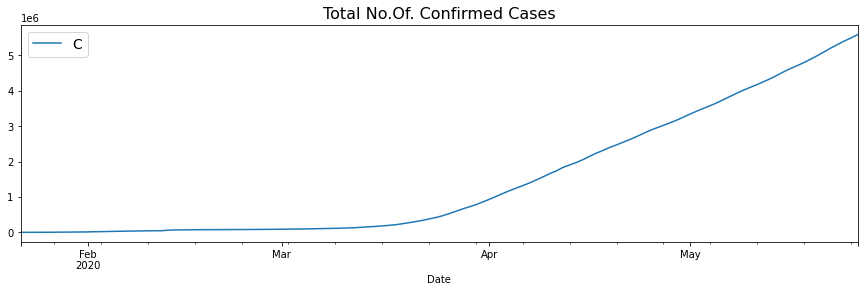

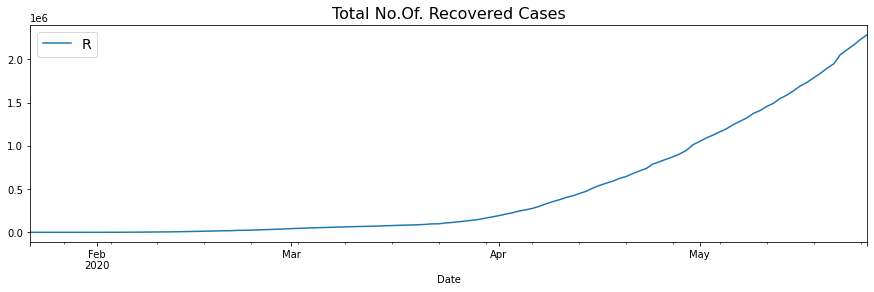

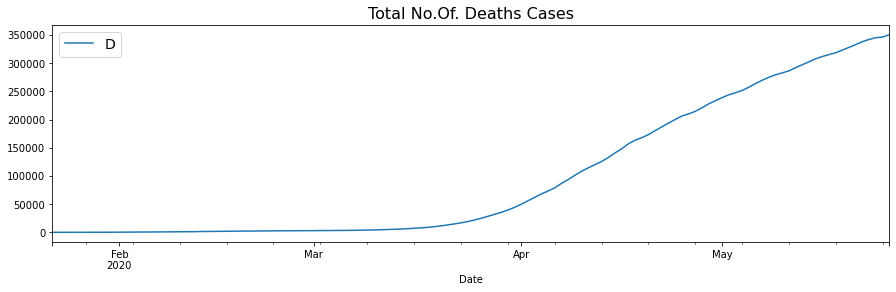

In [8]:
pd.pivot_table(cdf_1, index = 'Date', columns = 'Country',values = 'Confirmed', aggfunc = 'sum').sum(axis=1).plot(figsize=(15,4))
plt.legend('Confirmed',fontsize = 14,loc = 'best')
plt.title("Total No.Of. Confirmed Cases",fontsize = 16)
plt.show()

pd.pivot_table(cdf_1, index = 'Date', columns = 'Country',values = 'Recovered', aggfunc = 'sum').sum(axis=1).plot(figsize=(15,4))
plt.legend('Recovered',fontsize = 14,loc = 'best')
plt.title("Total No.Of. Recovered Cases",fontsize = 16)
plt.show()

pd.pivot_table(cdf_1, index = 'Date', columns = 'Country',values = 'Deaths', aggfunc = 'sum').sum(axis=1).plot(figsize=(15,4))
plt.legend('Deaths',fontsize = 14,loc = 'best')
plt.title("Total No.Of. Deaths Cases",fontsize = 16)
plt.show()

* The 1st plot states that the Confirmed cases since mid March 2020 had started to esclate gradually, but mid April onwards it started to grow at a constant slope.

* The recovery rate has been slow if we see on the no.of recoveries on y-axis but there has been a constant slope in the recovery of cases.

* There has been an accelerated growth in no.of death cases due to Covid, the represents the slope which took a sudden increase in numner since late March & has been increasing at a constant slope.

> But this graphs y - axis areall varied numbers so cant really correlate visually. Lets see the correlation of the data.

In [9]:
cdf_1.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


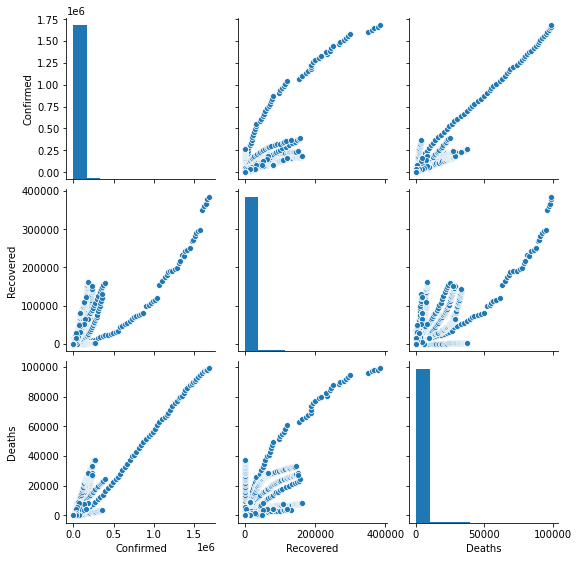

In [10]:
sns.pairplot(cdf_1)

The plot shows high postive correlation between Deaths to Confirmed & Recovered, lets see with the values & heatmap

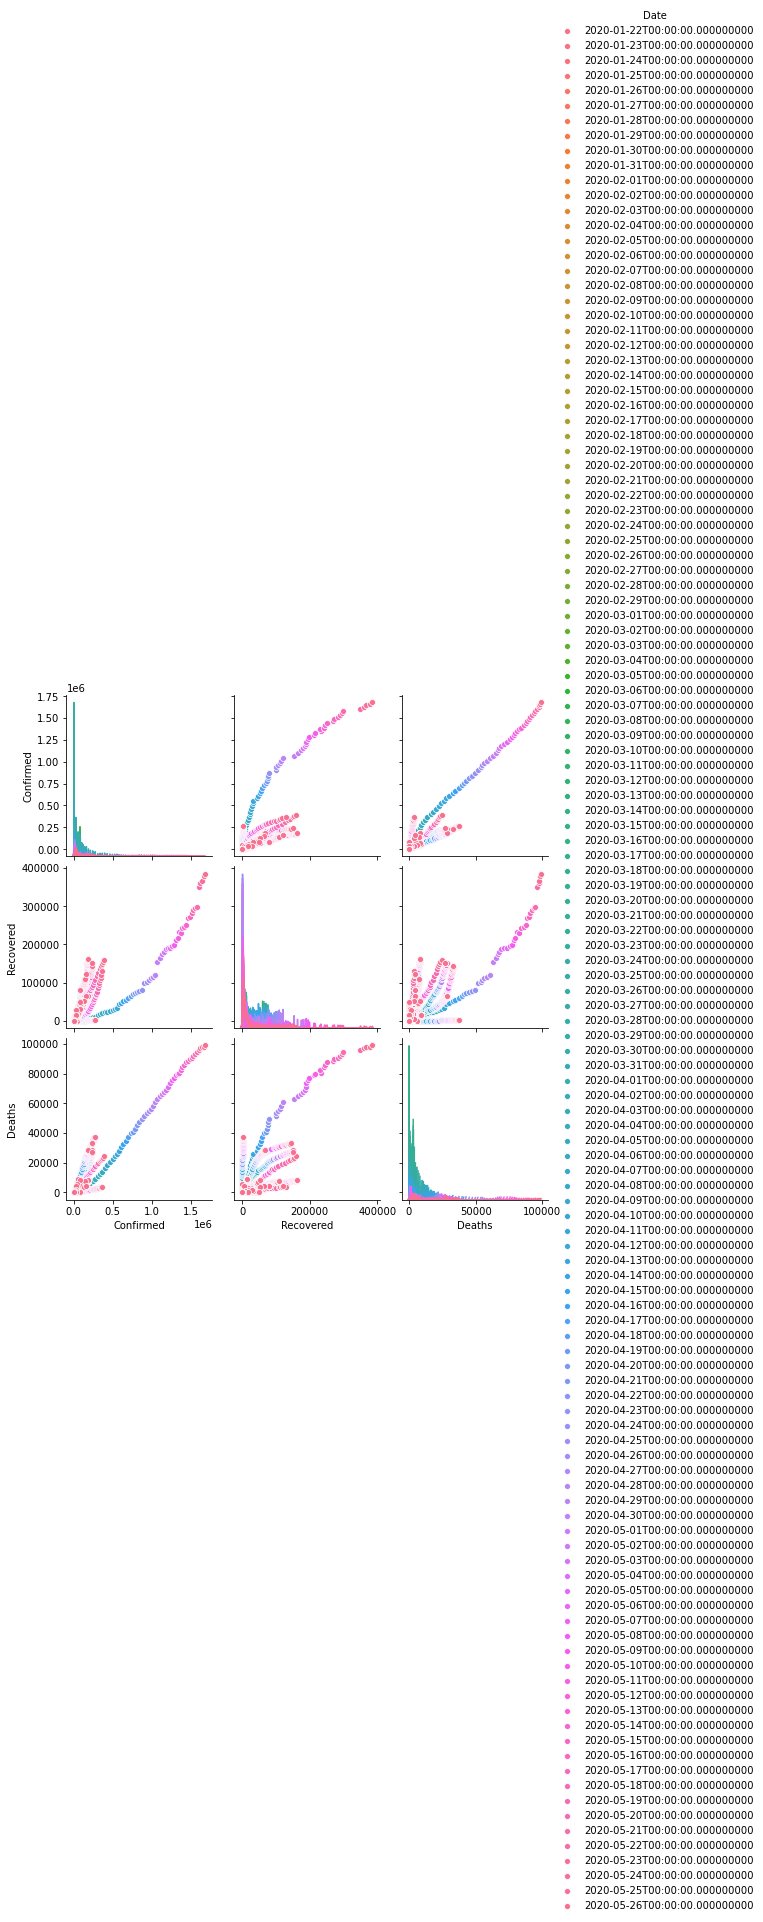

In [11]:
sns.pairplot(cdf_1,hue = 'Date')

* With hue as Dates the plot represents the relation with date with confirmed,recovered & deaths of cases due to Covind 19.
* There is a gradual positive relation between deaths & Confirmed cases which means that as time went by confirmed cases not only increased but also resulted in deaths.
* There is an upward trend in recovered cases but its a slow movement here & highere recovery is seen at later dates, since around 1st week of May 2020.


In [12]:
cdf_corr=cdf.corr()
cdf_corr

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


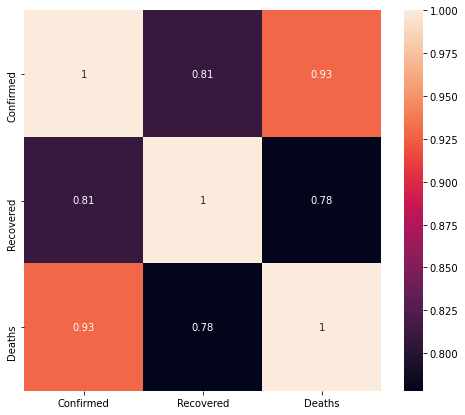

In [13]:
plt.figure(figsize = (8,7))
sns.heatmap(cdf_corr,annot = True)
plt.show()

* There is only positive correlation between Confirmed, Recovered & Deaths & all are intercorrelated with each other.

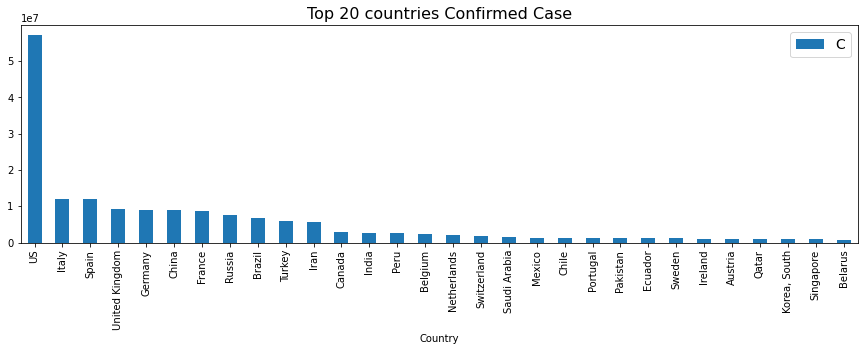

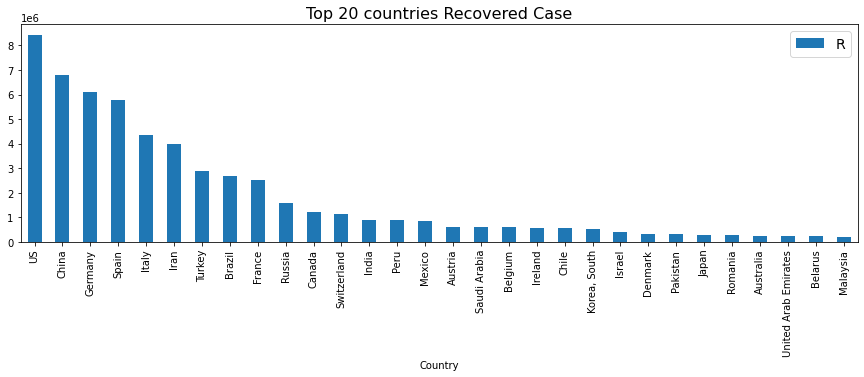

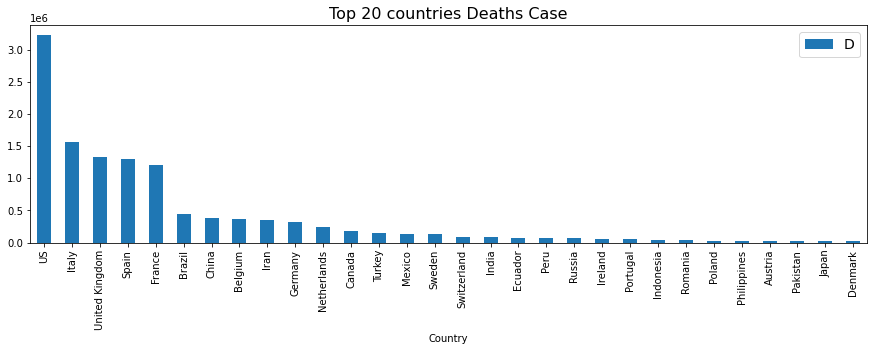

In [14]:
c=pd.pivot_table(cdf_1, index = 'Country',values = 'Confirmed', aggfunc = 'sum')

c.sort_values(by='Confirmed', ascending=False).sum(axis=1).head(30).plot(figsize=(15,4),kind="bar")
plt.legend('Confirmed',fontsize = 14,loc = 'best')
plt.title("Top 20 countries Confirmed Case",fontsize = 16)
plt.show()

d=pd.pivot_table(cdf_1, index = 'Country',values = 'Recovered', aggfunc = 'sum')

d.sort_values(by='Recovered', ascending=False).sum(axis=1).head(30).plot(figsize=(15,4),kind="bar")
plt.legend('Recovered',fontsize = 14,loc = 'best')
plt.title("Top 20 countries Recovered Case",fontsize = 16)
plt.show()

e=pd.pivot_table(cdf_1, index = 'Country',values = 'Deaths', aggfunc = 'sum')

e.sort_values(by='Deaths', ascending=False).sum(axis=1).head(30).plot(figsize=(15,4),kind="bar")
plt.legend('Deaths',fontsize = 14,loc = 'best')
plt.title("Top 20 countries Deaths Case",fontsize = 16)
plt.show()

These graphs shows data of Top 30 countries data for each Confirmed, Recovered & Deaths. 
> * USA Tops helist by highest no. of Confirmed Cases, followed by highest number of recovered cases & highest number of deaths cases globally.
* Followed by USA was Germany in highest number of confirmed cases & highest number of death cases whereas China had highest number of recovery comparatively.
* UK followed Italy in highest no.of. Death cases whereas Spain had higher no. of. Confirmed cases but Germany's recovery rate was better than Spain.
* UK, Germany,China,France,Russia,Brazil,Turkey,Iran were almost at the same range with total no.of.Confirmed Cases.
* Toe top countries to follow trend of recovery rates were, USA,China,Germany,Spain, Italy,Iran,Turkey,Brazil,France,Russia,Canada,Switzerland & India.
* The maximus life losses where in USA< followed by Italy,UK< Spain,France,Brazil,Cina.
* The least no.of confirmed cases reported where from Belarus & least no.of recovery case was from Malaysia where as the least no.of loss of life reported was from Denmark.

# Outliers & Skewness

Before treating Outliers & Skewness we need to remove date & Country columns.

In [15]:
cdf_2 = cdf.drop(['Date','Country'],axis =1)
cdf_2

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


In [16]:
from scipy. stats import zscore
z=np.abs(zscore(cdf_2))
threshold = 3
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [17]:
cdf_new = cdf_2[(z<3).all(axis=1)]
cdf_new.shape

(23177, 3)

In [18]:
cdf_2.shape

(23688, 3)

Percentage Loss of data

In [19]:
percentage_loss = ((23688-23177)/23688)*100
print(percentage_loss)

2.157210401891253


As the % loss of data is only 2.16% we will proceed with removal of outliers

In [20]:
cdf_final = cdf_new
cdf_final.shape

(23177, 3)

In [21]:
cdf_final.skew()

Confirmed    6.906829
Recovered    7.472281
Deaths       9.729360
dtype: float64

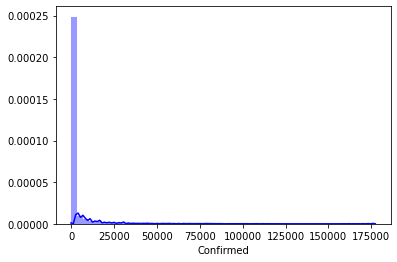

In [22]:
sns.distplot(cdf_final['Confirmed'],color = 'blue')

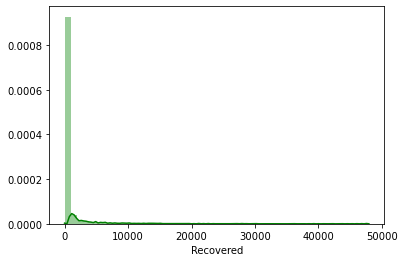

In [23]:
sns.distplot(cdf_final['Recovered'],color = 'green')

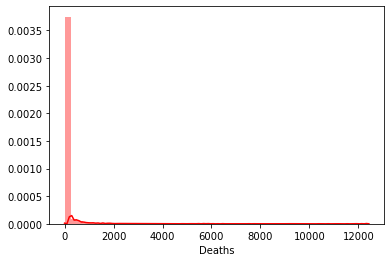

In [24]:
sns.distplot(cdf_final['Deaths'],kde = True,color = 'red')

There is high skewness in the data & needs to be treated for better moeling

# Splitting the Data

In [25]:
cdf_final

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


In [26]:
x=cdf_final.iloc[:,0:2]
x

,Confirmed,Recovered
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
23683,429,365
23684,9,6
23685,249,10
23686,920,336


In [27]:
y=cdf_final.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23177, dtype: int64

In [28]:
from sklearn.preprocessing import power_transform

In [29]:
x= power_transform(x,method = 'yeo-johnson')

SCALING THE DATA

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Modeling of the Data

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [32]:
lrs = LinearRegression()
rfr=RandomForestRegressor()
ls= Lasso()
rg = Ridge()

In [33]:
max_scr=0
for i in range(23,675):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.27)
    lrs.fit(x_train,y_train)
    pred_train=lrs.predict(x_train)
    pred_test=lrs.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At random_state = ', i, 'the model is running well' )
        print('Training r2 score = ', r2_score(y_train,pred_train))
        print('Testing r2 score = ', r2_score(y_test,pred_test))

At random_state =  73 the model is running well
Training r2 score =  0.09178419018871653
Testing r2 score =  0.09181501842398909
At random_state =  117 the model is running well
Training r2 score =  0.09191005861606161
Testing r2 score =  0.09187705701021953
At random_state =  290 the model is running well
Training r2 score =  0.09182412730580558
Testing r2 score =  0.09179304103446007
At random_state =  292 the model is running well
Training r2 score =  0.09178327420126609
Testing r2 score =  0.09181526914999394
At random_state =  439 the model is running well
Training r2 score =  0.09191796281235098
Testing r2 score =  0.09191375180799632
At random_state =  560 the model is running well
Training r2 score =  0.0919089425081343
Testing r2 score =  0.09187590067607454
At random_state =  625 the model is running well
Training r2 score =  0.09183066797457295
Testing r2 score =  0.09183266074219532


Model is running well with random-state = 439, 
* At random_state =  439 the model is running well
* Training r2 score =  0.09191796281235098
* Testing r2 score =  0.09191375180799632

lets use this random_state for best fit model

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=439,test_size=0.27)

model = [lrs,rfr,ls,rg]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('R2 Score  of', m, 'is: ', r2_score(y_test,predm))
    print('Errors : ')
    print('Mean Absolute Error is ', mean_absolute_error(y_test,predm))
    print("Mean Squared Error is " , mean_squared_error(y_test,predm))
    print("Root Mean Squarerot Error is ", np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')
    cross_val = cross_val_score(m,x,y,cv = 3)
    print('Cross Validation of ',m, 'is: ' )
    print('Mean CV of ',m, 'is: ',cross_val.mean(),'and','Std CV of ', 'm', 'is: ',cross_val.std())
    print('\n')

R2 Score  of LinearRegression() is:  0.09191375180799632
Errors : 
Mean Absolute Error is  233.05869969770492
Mean Squared Error is  374478.84330092906
Root Mean Squarerot Error is  611.9467650873963


Cross Validation of  LinearRegression() is: 
Mean CV of  LinearRegression() is:  -1.784233183249065 and Std CV of  m is:  2.486412336854289


R2 Score  of RandomForestRegressor() is:  0.6045289380091315
Errors : 
Mean Absolute Error is  63.84596294466964
Mean Squared Error is  163085.3304388081
Root Mean Squarerot Error is  403.83824786516703


Cross Validation of  RandomForestRegressor() is: 
Mean CV of  RandomForestRegressor() is:  0.14917008946069546 and Std CV of  m is:  0.33777121689490475


R2 Score  of Lasso() is:  0.09196909304249468
Errors : 
Mean Absolute Error is  232.3950664851072
Mean Squared Error is  374456.02154636214
Root Mean Squarerot Error is  611.9281179569723


Cross Validation of  Lasso() is: 
Mean CV of  Lasso() is:  -1.7146059657914465 and Std CV of  m is:  2.403

In [36]:
from sklearn.svm import SVR
svr = SVR()

In [38]:
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
predsvr = m.predict(x_test)
print('R2 Score  of', svr, 'is: ', r2_score(y_test,predsvr))
print('Errors : ')
print('Mean Absolute Error is ', mean_absolute_error(y_test,predsvr))
print("Mean Squared Error is " , mean_squared_error(y_test,predsvr))
print("Root Mean Squarerot Error is ", np.sqrt(mean_squared_error(y_test,predsvr)))
print('\n')
cross_val = cross_val_score(svr,x,y,cv = 3)
print('Cross Validation of ',svr, 'is: ' )
print('Mean CV of ',svr, 'is: ',cross_val.mean(),'and','Std CV of ', 'm', 'is: ',cross_val.std())

R2 Score  of SVR() is:  0.09191403961684563
Errors : 
Mean Absolute Error is  233.04857412904585
Mean Squared Error is  374478.72461360705
Root Mean Squarerot Error is  611.9466681121869


Cross Validation of  SVR() is: 
Mean CV of  SVR() is:  0.11838760883296869 and Std CV of  m is:  0.11543686756259333


# The scores of best 2 models are as below:

> R2 Score  of RandomForestRegressor() is:  0.6045289380091315
* Errors : 
* Mean Absolute Error is   63.84596294466964
* Mean Squared Error is  163085.3304388081
* Root Mean Squarerot Error is  403.83824786516703

* Cross Validation of  RandomForestRegressor() is: 
* Mean CV of  RandomForestRegressor() is:  0.14917008946069546 and Std CV of  m is:  0.33777121689490475

> R2 Score  of SVR() is:  0.09191403961684563
* Errors : 
* Mean Absolute Error is  233.04857412904585
* Mean Squared Error is  374478.72461360705
* Root Mean Squarerot Error is  611.9466681121869

* Cross Validation of  SVR() is: 
* Mean CV of  SVR() is:  0.11838760883296869  and Std CV of  m is: 0.11543686756259333



# Hypertuning the Model

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid',],'gamma': ['scale','auto']}
clf= GridSearchCV(svr,parameters,cv=3)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'rbf'}


In [41]:
svr=SVR(gamma ='scale', kernel= 'rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_svr=lrs.predict(x_test)
svrs = r2_score(y_test,pred_svr)
print('R2 score = ', r2_score(y_test,pred_svr))
print('MAE = ', mean_absolute_error(y_test,pred_svr))
print('MSE = ', mean_squared_error(y_test,pred_svr))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 score =  0.09191375180799632
MAE =  233.05869969770492
MSE =  374478.84330092906
RMSE =  611.9467650873963


In [42]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet()

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=439,test_size=0.27)

In [48]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'l1_ratio':[0.25,0.5,0.75,1],'fit_intercept':[True,False],
             'normalize':[True,False]}
clf = GridSearchCV(enr,parameters,cv=3)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.25, 'normalize': False}


In [52]:
enr = ElasticNet(alpha = 0.001, fit_intercept = 'True', l1_ratio =  0.25, normalize= False)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)
pred_enr=(rfr.predict(x_test))
enrs=r2_score(y_test,pred_enr)
print('R2 score is = ' , enrs*100)

enrcscore = cross_val_score(rfr,x,y,cv = 3)
enrm = enrcscore.mean()

print('Cross Val Score = ', enrcscore)
print('Mean of cross_val_score = ', enrm*100)
print ('Errors:')
print("Mean Absolute Error is ", mean_absolute_error(y_test,pred_enr))
print("Mean Squared Error is " , mean_squared_error(y_test,pred_enr))
print("Mean Squarerot Error is ", np.sqrt(mean_squared_error(y_test,pred_enr)))

R2 score is =  60.45289380091315
Cross Val Score =  [-0.11993213  0.41711588  0.37492072]
Mean of cross_val_score =  22.403482483791013
Errors:
Mean Absolute Error is  63.84596294466964
Mean Squared Error is  163085.3304388081
Mean Squarerot Error is  403.83824786516703


* Support Vector Regressors scores & errors with hypertuning was exactly the same as without hypertuning.
+ RandomForestRegressor's score was higher than SVR without Hypertuning. Hypertuning could not be performed as the parameters took too long time & did not give any output,tried various parameters but sill no result. 
* Performed Hypertuning with Elasticnet Model which performed well & gave a better R2score with least errors" 
* R2 score is =  60.45289380091315
* Mean of cross_val_score =  22.403482483791013
> Errors:
* Mean Absolute Error is  63.84596294466964
* Mean Squared Error is  163085.3304388081
* Mean Squarerot Error is  403.83824786516703

* Hence proceeding eith Elasticnet model for serialization

# Serialization

In [55]:
import joblib

In [56]:
joblib.dump(enr,'covid_dataset.pkl')

['covid_dataset.pkl']

# Conclusion

In [57]:
a=np.array(y_test)
p = np.array(enr.predict(x_test))
print(a)
print('\n')
print(p)
covid_df=pd.DataFrame({'Original': a, 'Predicted': p }, index = range (len(a)))
covid_df

[0 0 0 ... 0 0 0]


[-101.83862363 -101.83862363 -101.83862363 ... -101.83862363 -101.83862363
 -101.83862363]


,Original,Predicted
0,0,-101.838624
1,0,-101.838624
2,0,-101.838624
3,1,54.515942
4,0,-101.838624
...,...,...
6253,7,260.969359
6254,0,-101.838624
6255,0,-101.838624
6256,0,-101.838624
